<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobertoRomeroVielma-A00822314/blob/main/Arboldedecision_Equipo29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Eduardo Gabriel Arévalo Aguilar - A01793897
*   José Javier Granados Hernández - A00566717
*   Ernesto Enriquez Rubio - A01228409
*   Roberto Romero Vielma - A00822314  


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [2]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns

#**Ejercicio-1.** 
Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI. 


In [3]:
file="https://raw.githubusercontent.com/rromerov/Machine-Learning-Projects/main/SouthGermanCredit.asc"
credit=pd.read_table(file,sep=" ")

In [4]:
credit.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [5]:
columns_name=["status","duration","credit_history","purpose","amount","savings","employment_duration","installment_rate","personal_status_sex","other_debtors","present_residence","property","age","other_installment_plans","housing","number_credits","job","people_liable","telephone","foreign_worker","credit_risk"]
credit.columns=columns_name

In [6]:
credit.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [7]:
X=credit.iloc[:,:-1:]
y=credit.iloc[:,-1]

In [8]:
X.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


#**Ejercicio-2.**
 Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 
15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es 
necesario en este paso generar el conjunto de validación. Define como la variable X a todas las 
variables de entrada y a la variable Y como la variable de salida. 

In [9]:
X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.15,random_state=10)

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas 
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de 
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal 
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha 
información realiza un Pipeline que incluya al menos las siguientes transformaciones: 

a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable 
(decide y justifica que tipo de imputación realizas en cada caso).  

<font color=royalblue> En el análisis descriptivo de los parámetros cuantitativos no se notan distinciones de distribuciones traslapadas; es decir, todos los datos forman parte de un mismo conjunto. Por lo mismo el método de imputación seleccionado es el de sustitución por mediana. Con éste método aseguramos que los posibles datos faltantes contribuirán a la distribución observada de los datos sin ocasionar ningún tipo de sesgo. 

Los datos binarios, categóricos y ordinales son imputados de manera que la moda será usada como sustitución de cualquier faltante. La selección de éste método podría potencialmente ejercer sesgo en la distribución de los datos. Sin embargo, no existen datos faltantes en nuestra información. Si éste método llegara a crear un sesgo, se recomendaría como siguiente paso monitorear los datos faltantes y llegar a algún tipo de regla para balancear las cantidades o dejar de utilizar la variable para crear modelos. </font>



b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una 
transformación que escale a todas ellas en un rango equiparable. 

c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y 
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la 
transformación one-hot encoding. Por el momento dejar las variables ordinales sin 
transformar.

<font color=royalblue size=""> 
Las variables binarias no justifican una transformación tipo OneHotEncoding, pues la información categórica que proveen ya está en la forma más simplificada. </font>


In [16]:
numeric_features=["duration","amount","age"]
numeric_pipeline = Pipeline(
    steps=[("Mednum", SimpleImputer(strategy="median")), ("MinMax",MinMaxScaler(feature_range=(1,2)))])


categorical_features =["status","credit_history","purpose","savings","personal_status_sex","other_debtors","other_installment_plans","housing"]
categorical_pipeline=Pipeline(
    steps=[("Modacat", SimpleImputer(strategy="most_frequent")),("OHEcat",OneHotEncoder(handle_unknown="ignore"))]
)

ordinal_features=["employment_duration","installment_rate","present_residence","property","number_credits","job"]
ordinal_pipeline=Pipeline(
    steps=[("Modaord",SimpleImputer(strategy="most_frequent")),("OHEord",OneHotEncoder(handle_unknown="ignore"))]
)


binary_features=["people_liable","telephone","foreign_worker"]
binary_pipeline=Pipeline(
    steps=[("Modabi",SimpleImputer(strategy="most_frequent")),("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)       

columnasTransformer = ColumnTransformer(transformers = [('numpipe', numeric_pipeline, numeric_features),
                                                        ('catpipe', categorical_pipeline, categorical_features),
                                                        ('ordpipe', ordinal_pipeline, ordinal_features),
                                                        ('binpipe', binary_pipeline, binary_features)])

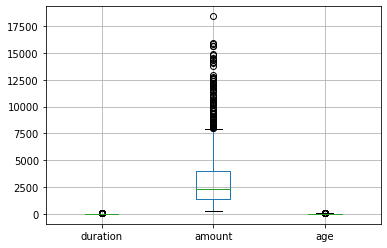

In [17]:
numeric_values=credit[numeric_features].copy()
numeric_values.boxplot()

In [18]:
for col in credit.columns:

    col_min = credit[col].min()

    col_mean = credit[col].mean()

    col_3q = credit[col].quantile(0.75)

    col_max = credit[col].max()

    print(f'Column {col:30s} : min:{col_min:5}, mean:{col_mean:10}, 3Q:{col_3q:10}, max:{col_max:5}.')

Column status                         : min:    1, mean:     2.577, 3Q:       4.0, max:    4.
Column duration                       : min:    4, mean:    20.903, 3Q:      24.0, max:   72.
Column credit_history                 : min:    0, mean:     2.545, 3Q:       4.0, max:    4.
Column purpose                        : min:    0, mean:     2.828, 3Q:       3.0, max:   10.
Column amount                         : min:  250, mean:  3271.248, 3Q:   3972.25, max:18424.
Column savings                        : min:    1, mean:     2.105, 3Q:       3.0, max:    5.
Column employment_duration            : min:    1, mean:     3.384, 3Q:       5.0, max:    5.
Column installment_rate               : min:    1, mean:     2.973, 3Q:       4.0, max:    4.
Column personal_status_sex            : min:    1, mean:     2.682, 3Q:       3.0, max:    4.
Column other_debtors                  : min:    1, mean:     1.145, 3Q:       1.0, max:    3.
Column present_residence              : min:    1, mean:    

In [19]:
credit[["credit_risk"]].value_counts()

credit_risk
1              700
0              300
dtype: int64

#**Ejercicio-4.**
Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de 
aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás 
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda 
aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las 
siguientes características:

a. Usa los parámetros predeterminados de cada modelo. 

b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, 
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes 
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. 
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() 
de scikit-learn para definir las métricas). 

c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 


In [20]:
def mi_accuracy(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  accuracy=(VN+VP)/(VN+FP+FN+VP)
  return accuracy

def mi_precission(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  precision=(VP)/(VP+FP)
  return precision

def mi_recall(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  recall=(VP)/(VP+FN)
  return recall

def mi_f1score(yreal,ypred):
    VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
    recall=(VP)/(VP+FN)
    precision=(VP)/(VP+FP)
    f1score=(2*recall*precision)/(precision+recall)
    return f1score

def mi_gmean(yreal,ypred):
    VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
    recall=(VP)/(VP+FN)
    specifity=(VN)/(VN+FP)
    gmean=np.sqrt(recall*specifity)
    return gmean


In [22]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression())
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # RF . Bosque Aleatorio
  modelos.append(RandomForestClassifier())
  nombres.append('RF')

  return modelos, nombres

d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está sub entrenado o sobreentrenado? Justifica tu respuesta. 


<font color=royalblue>El modelo del árbol de decisión cuenta con un excelente desempeño en la etapa de entrenamiento, tanto en la métrica de recall como la de accuracy, sin embargo en el conjunto de prueba se ve un decremento importante en las métricas anteriormente mencionadas, lo que lleva a pensar que el modelo está sobreentrenado. El modelo del Random Forest también se considera que está sobreentrenado, dado que el accuracy cuenta con un nivel alto en la etapa de prueba, mientras que en la validación cuenta con un score más bajo, en tanto que el modelo de regresión logística podríamos considerar que tiene un modelo óptimo, dado que tanto la métrica de accuracy como la de recall cuentan con un score parecido, lo que da a entender que posiblemente se cuente con un modelo ideal.</font> 

In [23]:
modelos, nombres = get_models()  
resultadosLDR = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  mismetricas={"accuracy":make_scorer(mi_accuracy),"precission":make_scorer(mi_precission),"recall":make_scorer(mi_recall),"f1score":make_scorer(mi_f1score),"gmean":make_scorer(mi_gmean)}
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
  resultados = cross_validate(pipeline, X_tv, y_tv, scoring=mismetricas, cv=kfold, error_score="raise",return_train_score=True)
  resultadosLDR.append(resultados)  
  print("Prueba \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['test_accuracy']),
                                                                          np.std(resultados['test_accuracy']), 
                                                                          np.mean(resultados['test_precission']),
                                                                          np.std(resultados['test_precission']),
                                                                          np.mean(resultados['test_recall']),
                                                                          np.std(resultados['test_recall']), 
                                                                          np.mean(resultados['test_f1score']),
                                                                          np.std(resultados['test_f1score']),                                                                           
                                                                          np.mean(resultados['test_gmean']),
                                                                          np.std(resultados['test_gmean']),                                                                            
                                                                          ))
  print("Entrenamiento \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precission: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultados['train_accuracy']), np.std(resultados['train_accuracy']),  
                                                                          np.mean(resultados['train_precission']), np.std(resultados['train_precission']), 
                                                                          np.mean(resultados['train_recall']), np.std(resultados['train_recall']),
                                                                          np.mean(resultados['train_f1score']), np.std(resultados['train_f1score']), 
                                                                          np.mean(resultados['train_gmean']), np.std(resultados['train_gmean']) ))

Prueba 

LR:
mean Accuracy: 0.754 (0.0292)
mean Precission: 0.799 (0.0171)
meanRecall: 0.872 (0.0329)
mean F1-Score: 0.834 (0.0215)
Gmean: 0.638 (0.0392)

Entrenamiento 

LR:
mean Accuracy: 0.800 (0.0079)
mean Precision: 0.825 (0.0087)
mean Recall: 0.911 (0.0076)
mean F1score: 0.866 (0.0049)
Gmean: 0.695 (0.0181)

Prueba 

DT:
mean Accuracy: 0.670 (0.0234)
mean Precission: 0.774 (0.0189)
meanRecall: 0.754 (0.0355)
mean F1-Score: 0.764 (0.0193)
Gmean: 0.590 (0.0392)

Entrenamiento 

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Prueba 

RF:
mean Accuracy: 0.754 (0.0217)
mean Precission: 0.778 (0.0132)
meanRecall: 0.914 (0.0328)
mean F1-Score: 0.840 (0.0160)
Gmean: 0.577 (0.0400)

Entrenamiento 

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)



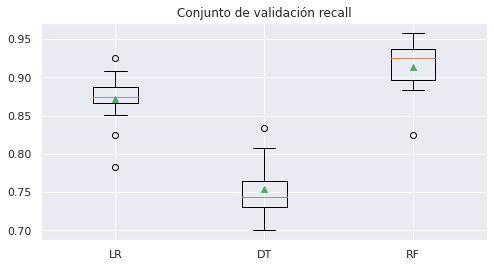

In [60]:
sns.set(rc={'figure.figsize':(8,4)})

bpRecall = list()
for i in range(len(resultadosLDR)):
  rr = resultadosLDR[i]['test_recall']
  bpRecall.append(rr)
plt.title("Conjunto de validación recall")
plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

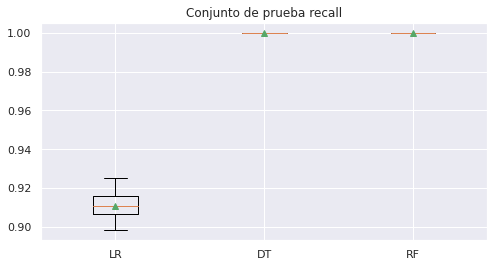

In [61]:
sns.set(rc={'figure.figsize':(8,4)})

bpRecall = list()
for i in range(len(resultadosLDR)):
  rr = resultadosLDR[i]['train_recall']
  bpRecall.append(rr)
plt.title("Conjunto de prueba recall")
plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de 
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 

i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión Logística con su 
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de 
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”. 

In [62]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('F1-Score')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [64]:
def mi_ModeloYCurvas(Xin):

       modeloL = LogisticRegression(max_iter=2500, random_state=1)

       mi_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo", modeloL)])

       mi_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=7)
       
       delta_train_sz = np.linspace(0.1,1.0,40)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_tv,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring=make_scorer(mi_f1score),
                                                        random_state=10)
       
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo de regresión logística:


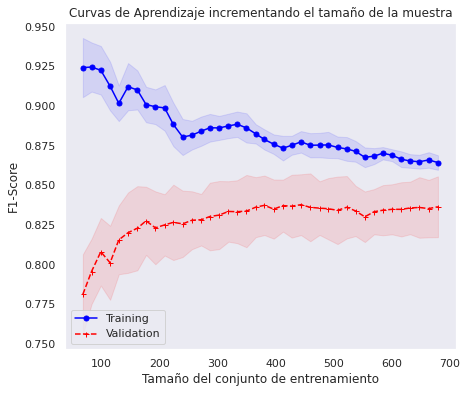

In [65]:
print('Curvas de aprendizaje del modelo de regresión logística:')
mi_ModeloYCurvas(X_tv)

<font color=royalblue> El modelo no está ni subentrenado ni sobreentrenado, en otras palabras es un modelo óptimo el que se tiene con la regresión logística. </font>

ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando 
la complejidad del hiperparámetro “max_depth” para el modelo de árbol de 
decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del 
desempeño del modelo. 



In [69]:
def mi_ValidationCurvePlot(train_scores,test_scores,parameter_range):

  mean_train_score = np.mean(train_scores, axis = 1)
  std_train_score = np.std(train_scores, axis = 1)
  
  mean_test_score = np.mean(test_scores, axis = 1)
  std_test_score = np.std(test_scores, axis = 1)
  plt.figure(figsize=(7,6))

  plt.plot(parameter_range, mean_train_score,
      label = "Training", color = 'blue', marker='o', markersize=5)
  plt.fill_between(parameter_range, mean_train_score - std_train_score, mean_train_score + std_train_score, color="blue",alpha=0.1)
  
  plt.plot(parameter_range, mean_test_score,
    label = "Validation", color = 'red', marker='+', markersize=5, linestyle='--')
  plt.fill_between(parameter_range, mean_test_score - std_test_score, mean_test_score + std_test_score, color="red",alpha=0.1)

  plt.title("Curva de validación")
  plt.xlabel("Tamaño del conjunto de validación")
  plt.ylabel("F1-Score")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

In [70]:
def mi_ModeloValidacion(Xin,param_name_dt):

       modeloDT = DecisionTreeClassifier()
       pipeDT =  Pipeline(steps=[("ct", columnasTransformer), ("model", modeloDT)])
       kfoldDT = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=7)
       range = np.linspace(1, 20, 20)
       tr_scores, val_scores = validation_curve(estimator =pipeDT ,    
                                                        X = Xin,
                                                        y = y_tv,
                                                        cv = kfoldDT ,
                                                        param_name=f"model__{param_name_dt}",
                                                        param_range = range ,
                                                        scoring=make_scorer(mi_f1score))
       
       mi_ValidationCurvePlot(tr_scores, val_scores,range)

Arbol de decisión


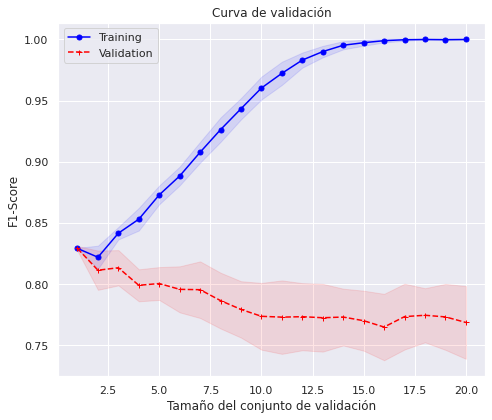

In [71]:
print("Arbol de decisión")
mi_ModeloValidacion(X_tv,"max_depth")

<font color=royalblue>La curva de validación muestra que después de aumentar el conjunto de validación más allá de 14, el modelo empieza a estar sobreentrenado; el score es muy alto. El comportamiento de la curva de validación se mantiene estable a pesar del sobre entrenamiento, que en otros casos provoca que el score baje. La mejor decisión con respecto a ésta imagen sería tomar el modelo creado con el conjunto de datos de 13. </font>

iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión bosque aleatorio (random 
forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en 
la partición de los conjuntos de entrenamiento y la métrica “recall”, como 
evaluación del desempeño del modelo. 


In [72]:
def mi_LearningCurvePlotRecall(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Recall')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [73]:
def mi_ModeloRandomForest(Xin):

       modelo = RandomForestClassifier()
       mi_pipe =  Pipeline(steps=[("ct", columnasTransformer), ("modelo", modelo)])
       mi_kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=7)
       delta_train_sz = np.linspace(0.1,1.0,20)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_tv,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring=make_scorer(mi_recall),
                                                        random_state=10)

       mi_LearningCurvePlotRecall(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del random forest:


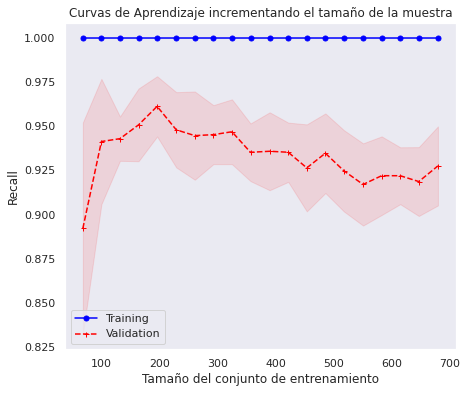

In [74]:
print('Curvas de aprendizaje del random forest:')
mi_ModeloRandomForest(X_tv)

<font color="royalblue"> El Random Forest como se puede observar, está clasificando los elementos como debe ser, tal como se puede observar en el recall de la gráfica, no existe una gran diferencia entre en el conjunto de validación y el de prueba (es decir no existe un gap enorme entre los 2).</font>

#**Ejercicio-5.**

5. Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así 
como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método 
GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores 
hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación 
cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas 
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también 
aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha 
seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. 
Puedes consultar su documentación de GridSearchCV en la siguiente liga: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores 
hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su 
búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso 
deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de 
parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la 
métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la 
documentación. <font color="royalblue"> La razón de que se utilice F1-Score como métrica para obtener el desempeño del modelo de regresión logística se debe principalmente a que es la combinación de Precission y Recall, lo que nos permite tener ambas métricas en un sólo parámetro. </font>


In [41]:
logmodel=LogisticRegression(max_iter=9000,random_state=1)
log_pipe=Pipeline(steps=[("Col", columnasTransformer),("model", logmodel)])
log_kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7) 

paramc=[0.01, 0.1, 1, 10, 100, 1000]

paramgr=[{'model__penalty': ['l1'], 'model__solver': [ 'saga','liblinear'], 'model__class_weight':['balanced', None], 'model__C': paramc},
                  {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': paramc},
                  {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': paramc, 'model__l1_ratio': [0.5]},
                 ]

gridLog=GridSearchCV(estimator =  log_pipe, 
                            param_grid = paramgr,
                            scoring = make_scorer(mi_f1score), 
                            cv = log_kfold,
                     n_jobs=-1)

gridLog.fit(X_tv,np.ravel(y_tv))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.82919777 0.82919777 0.70472567 0.70601402
 0.82571367 0.82558437 0.77977206 0.77880662 0.83469135 0.83513073
 0.78243853 0.78256707 0.83042105 0.82996721 0.78101787 0.78101787
 0.82943019 0.82943019 0.78066127 0.7802909  0.82943019 0.82879734
 0.75789157 0.75789157 0.75109729 0.75731579 0.75202389 0.82919777
 0.82919777 0.82945602 0.82919777 0.82919777 0.77410586 0.77410586
 0.76992591 0.77336078 0.76992591 0.84053425 0.84053425 0.83697564
 0.83923393 0.83721206 0.78680479 0.78680479 0.78713125 0.78686934
 0.78686934 0.83641385 0.83641385 0.83506261 0.83515494 0.83515494
 0.78303812 0.78303812 0.78315865 0.78315865 0.78315865 0.83129724
 0.83129724 0.83131307 0.83101314 0.83101314 0.78101787 0.78101787
 0.78101787 0.78101787 0.78101787 0.8297506  0.8297506  0.82943019
 0.82943019 0.8297506  0.78066127 0.78066127 0.78066127 0

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('Col',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('Mednum',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('MinMax',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                                                          'amount',
                                             

In [42]:
print("El mejor resultado es:",gridLog.best_score_)
print("El mejor parámetro es:",gridLog.best_params_)

El mejor resultado es: 0.8405342495882615
El mejor parámetro es: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}


b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” 
para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), 
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees 
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y 
evitar el sobreentrenamiento o el subentrenamiento. 


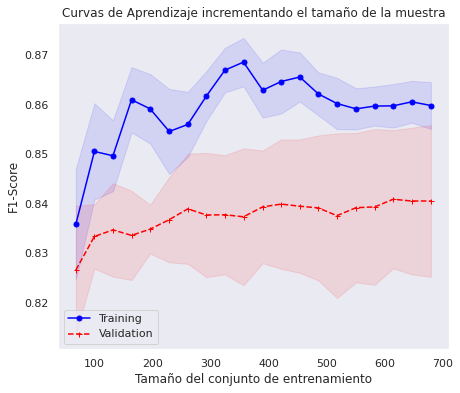

In [46]:
bestLogmodel=LogisticRegression(C=gridLog.best_params_.get('model__C'),
                                solver=gridLog.best_params_.get('model__solver'),
                                penalty=gridLog.best_params_.get('model__penalty'),
                                max_iter=8000, 
                                random_state=1)
bestLog_pipe=Pipeline(steps=[("Col", columnasTransformer),("model", bestLogmodel)])
kfold_bestLog=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
train_size_bestLog=np.linspace(0.1, 1.0, 20)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = bestLog_pipe ,    
                                                        X = X_tv,
                                                        y = y_tv,
                                                        cv = kfold_bestLog ,
                                                        train_sizes = train_size_bestLog ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir 
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) 
“precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor 
del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de 
la métrica “precision”? Incluye tus conclusiones. <font color="royalblue"> La métrica de precision nos dicen que tan bueno es nuestro modelo para detectar Verdaderos Positivos (VP), sin meter Falsos Positivos (FP) y no toma en cuenta los Falsos Negativos (FN). </font>

In [47]:
modelo_arbol=DecisionTreeClassifier() 
modelo_arbol_pipe=Pipeline(steps=[("Col", columnasTransformer),("model", modelo_arbol)])
arbol_kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7) 

paramgr = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001,.000001,.0000001],  
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10], 
              'model__class_weight': ['balanced', None]}

gridarbol=GridSearchCV(estimator=modelo_arbol_pipe,
                       param_grid=paramgr,
                       scoring=make_scorer(mi_precission),
                       cv=arbol_kfold)
gridarbol.fit(X_tv,np.ravel(y_tv))  

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('Col',
                                        ColumnTransformer(transformers=[('numpipe',
                                                                         Pipeline(steps=[('Mednum',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('MinMax',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                                                          'amount',
                                             

In [48]:
print("El mejor resultado es:",gridarbol.best_score_)
print("El mejor parámetro es:",gridarbol.best_params_)

El mejor resultado es: 0.882290432268785
El mejor parámetro es: {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}


d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” 
para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), 
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees 
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y 
evitar el sobreentrenamiento o el subentrenamiento. 


In [77]:
def mi_LearningCurvePlotPrecision(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Precision')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

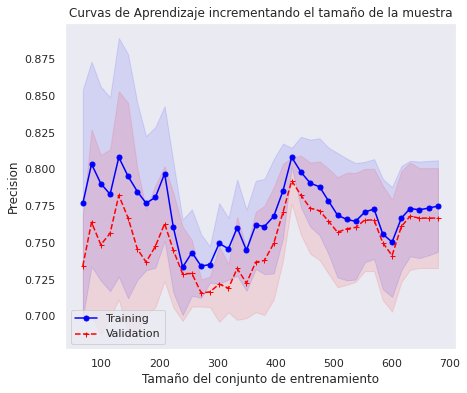

In [78]:
modeload = DecisionTreeClassifier(ccp_alpha=gridarbol.best_params_.get('model__ccp_alpha'),
                                    criterion=gridarbol.best_params_.get('model__criterion'),
                                    max_depth=gridarbol.best_params_.get('model__max_depth'),
                                    min_samples_split=gridarbol.best_params_.get('model__min_samples_split'))

ad_pipe = Pipeline(steps=[("Colum Transformer", columnasTransformer),("ModeloDecisionTree", modeload)])
ad_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
delta_train_sz = np.linspace(.1, 1, 40) 
tr_sizes, tr_scores, val_scores = learning_curve(estimator = ad_pipe ,    
                                                      X = X_tv,
                                                      y = y_tv,
                                                      cv = ad_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=10,
                                                      scoring=make_scorer(mi_precission)) 

mi_LearningCurvePlotPrecision(tr_sizes, tr_scores, val_scores)

e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir 
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. 
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor 
desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica 
“recall”? Incluye tus conclusiones. 
NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en 
llevar a cabo 

<font color="royalblue"> La métrica de Recall nos dice que tan bueno es el modelo para predecir Verdaderos Positivos (VP), sin meter Falsos Negativos (FN) y no toma en cuenta los Falsos Positivos (FP).</font>

In [50]:
modelo_rf=RandomForestClassifier() 
modelo_rf_pipe=Pipeline(steps=[("Col", columnasTransformer),("model", modelo_rf)])
rf_kfold=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7) 

# paramgr = {'model__max_depth':[1,2,3,4,5],  
#               'model__criterion': ["gini", "entropy", "log_loss"], 
#               'model__ccp_alpha':[2, 4, 6, 8, 10, 12], 
#               'model__min_samples_split':[2, 4, 6,8,10], 
#               'model__class_weight': ['balanced',"balanced_subsample", None]
#            }

paramgr=[
    {"max_depth":[1,2,3,4,5], 
     "criterion":["gini", "entropy", "log_loss"],
     "ccp_alpha":[0.01,0.001,0.0001,0.00001],
     "min_samples_split":[2, 4, 6,8,10],
     "class_weight": ['balanced',"balanced_subsample", None]
     }
]

gridrf=GridSearchCV(estimator=modelo_rf,
                       param_grid=paramgr,
                       scoring=make_scorer(mi_recall),
                       cv=rf_kfold)
gridrf.fit(X_tv, np.ravel(y_tv))   

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4500 fits failed out of a total of 13500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/jobl

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=RandomForestClassifier(),
             param_grid=[{'ccp_alpha': [0.01, 0.001, 0.0001, 1e-05],
                          'class_weight': ['balanced', 'balanced_subsample',
                                           None],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'min_samples_split': [2, 4, 6, 8, 10]}],
             scoring=make_scorer(mi_recall))

In [51]:
print("El mejor resultado es:",gridrf.best_score_)
print("El mejor parámetro es:",gridrf.best_params_)

El mejor resultado es: 1.0
El mejor parámetro es: {'ccp_alpha': 0.01, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para 
el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), 
incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con 
al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres 
adecuados para mejorar el resultado y evitar el sobreentrenamiento o el 
subentrenamiento. 


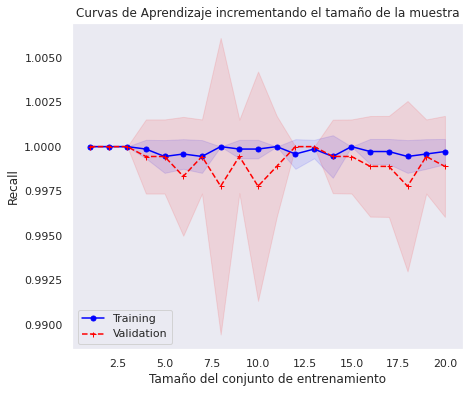

In [56]:
modelo_best_RF = RandomForestClassifier(ccp_alpha=gridrf.best_params_.get('ccp_alpha'),
                                 criterion=gridrf.best_params_.get('criterion'),
                                 max_depth=10,
                                 min_samples_split=gridrf.best_params_.get('min_samples_split'))
mi_pipe = Pipeline(steps=[("PreparaInfo", columnasTransformer),("ModeloRandomForest", modelo_best_RF)])
mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 
delta_train_sz = np.linspace(1,20,20, dtype=int) 



tr_scores, val_scores = validation_curve(n_jobs = -1, 
                                  estimator = mi_pipe, 
                                  X = X_tv,
                                  y = np.ravel(y_tv),
                                  param_name = f"ModeloRandomForest__max_depth", 
                                  param_range = delta_train_sz,
                                  cv = mi_kfold, 
                                  scoring = 'recall',
                                
                                  )
mi_LearningCurvePlotRecall(delta_train_sz, tr_scores, val_scores)

#**Ejercicio-6.**
Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando 
el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te 
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo 
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para 
entrenamiento y validación: 

a. Obtener el modelo de regresión logística con los mejores parámetros que hayas 
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye 
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final 
obtenido. 

In [57]:
estimatorLog=gridLog.best_estimator_
predictions = estimatorLog.predict(X_test)
print("Métrica f1-score: %.3f \n" %(mi_f1score(y_test, predictions)))

Métrica f1-score: 0.832 



<font color="royalblue"> La métrica de F1-Score nos da resultados buenos en el caso de este modelo, sin embargo es importante observar las demás métricas como Precision y Recall para saber en que está fallando nuestro modelo y en base a ello determinar si nuestro modelo está subentrenado, sobreentrenado o es un modelo ideal. </font>

b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas 
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e 
incluye tus conclusiones finales para este caso. 

Métrica precission: 0.889 



[Text(0.5, 0.8333333333333334, 'X[6] <= 0.5\nentropy = 1.0\nsamples = 850\nvalue = [425.0, 425.0]'),
 Text(0.25, 0.5, 'X[0] <= 1.272\nentropy = 0.954\nsamples = 510\nvalue = [356.452, 213.206]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.998\nsamples = 299\nvalue = [159.375, 145.432]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.82\nsamples = 211\nvalue = [197.077, 67.774]'),
 Text(0.75, 0.5, 'X[36] <= 0.5\nentropy = 0.802\nsamples = 340\nvalue = [68.548, 211.794]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.0\nsamples = 52\nvalue = [25.706, 26.121]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.696\nsamples = 288\nvalue = [42.843, 185.673]')]

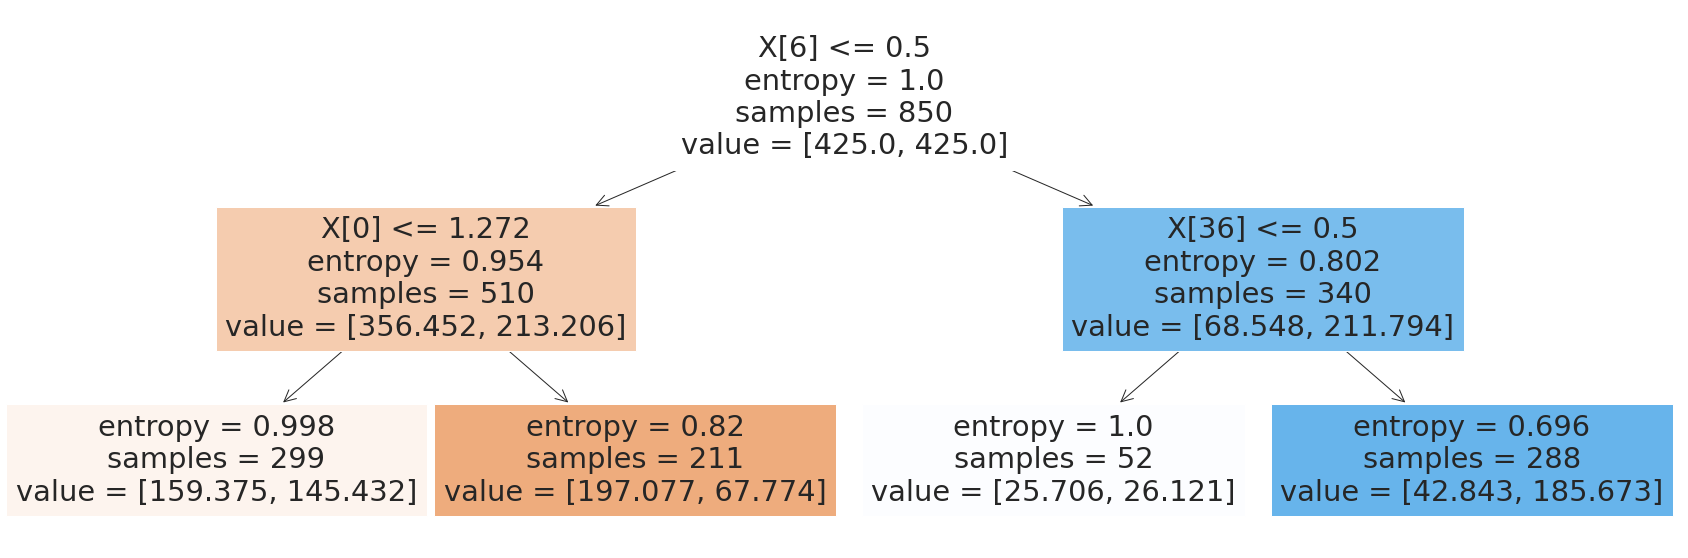

In [58]:
estimatorDT= gridarbol.best_estimator_

predictions = estimatorDT.predict(X_test)
print("Métrica precission: %.3f \n" %(mi_precission(y_test, predictions)))
plt.figure(figsize=(30,10))
tree.plot_tree(estimatorDT.named_steps["model"], filled = True)

<font color="royalblue">El método de GridSearch nos ayuda a encontrar de entre las combinaciones de métodos de optimización y variación de sus parámetros el mejor modelo para nuestro objetivo. Con esa información podemos apreciar que los modelos resultantes han sido optimizados. Dicho esto, la clasificación evaluada con las métricas como “precision”, “recall” y “f1 score” muestran un modelo capaz de encontrar la mejor solución encima del 86% de las veces.
El siguiente paso evidente para mejorar el modelo es balancear las clases. Pues sólo estas se encuentran en 33%/67%. </font>




c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas 
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye 
tus conclusiones finales para este caso. 

In [59]:
estimatorRF=gridrf.best_estimator_
predictions=gridrf.predict(X_test)

print("Métrica recall: %.3f \n" %(mi_recall(y_test, predictions)))

Métrica recall: 1.000 



<font color="royalblue">La conclusión anterior se aplica de igual manera en este caso, sin embargo el modelo de Random Forest cuenta con un mejor score, lo que indica que Random Forest es un mejor modelo para resolver este problema de clasificación. </font>

###**Fin de la Actividad de la semana 6.**